In [1]:
import sys
sys.path.append('../')
from configs import cfg
import numpy as np

import cv2

from PIL import Image
from datasets import make_dataset 
from lib.utils.visualization import Visualizer
import matplotlib.pyplot as plt
import pdb
# %matplotlib notebook
config_file = '../configs/JAAD.yaml'

cfg.merge_from_file(config_file)
cfg.DATASET.ROOT = '../data/JAAD'
# cfg.freeze()

In [2]:
dataset = make_dataset(cfg, split='train')

---------------------------------------------------------
Generating action sequence data
fstride: 1
sample_type: beh
subset: default
height_rng: [0, inf]
squarify_ratio: 0
data_split_type: default
seq_type: intention
min_track_size: 0
random_params: {'ratios': None, 'val_data': True, 'regen_data': False}
kfold_params: {'num_folds': 5, 'fold': 1}
max_size_observe: 30
max_size_predict: 5
seq_overlap_rate: 0.5
balance: True
crop_type: context
crop_mode: pad_resize
encoder_input_type: []
decoder_input_type: ['bbox']
output_type: ['intention_binary']
---------------------------------------------------------
Generating database for jaad
jaad database loaded from /home/brianyao/Documents/intention2021icra/data/JAAD/data_cache/jaad_database.pkl
---------------------------------------------------------
Generating intention data
Split: train
Number of pedestrians: 324 
Total number of samples: 324 
---------------------------------------------------------
Balancing the number of positive and ne

In [21]:
ret = dataset.__getitem__(300)
t = 15
bboxes = ret['input_x']
image_files = ret['image_files']
intention = ret['obs_intent']
action = ret['obs_action']
crossing = ret['obs_crossing']
behaviors = {
                'intention':int(intention[t][0]), 
                'action':int(action[t]), 
                'crossing':int(crossing[t])
               }

In [22]:
# cross_type = {0: 'not crossing', 1: 'crossing ego', -1: 'crossing others'}
# action_type = {0: 'standing', 1: 'walking'}
# intention_type = {0: 'will not cross', 1: "will cross"}
# vehicle: {'stopped': 0, 'moving_slow': 1, 'moving_fast': 2,
#                                'decelerating': 3, 'accelerating': 4},

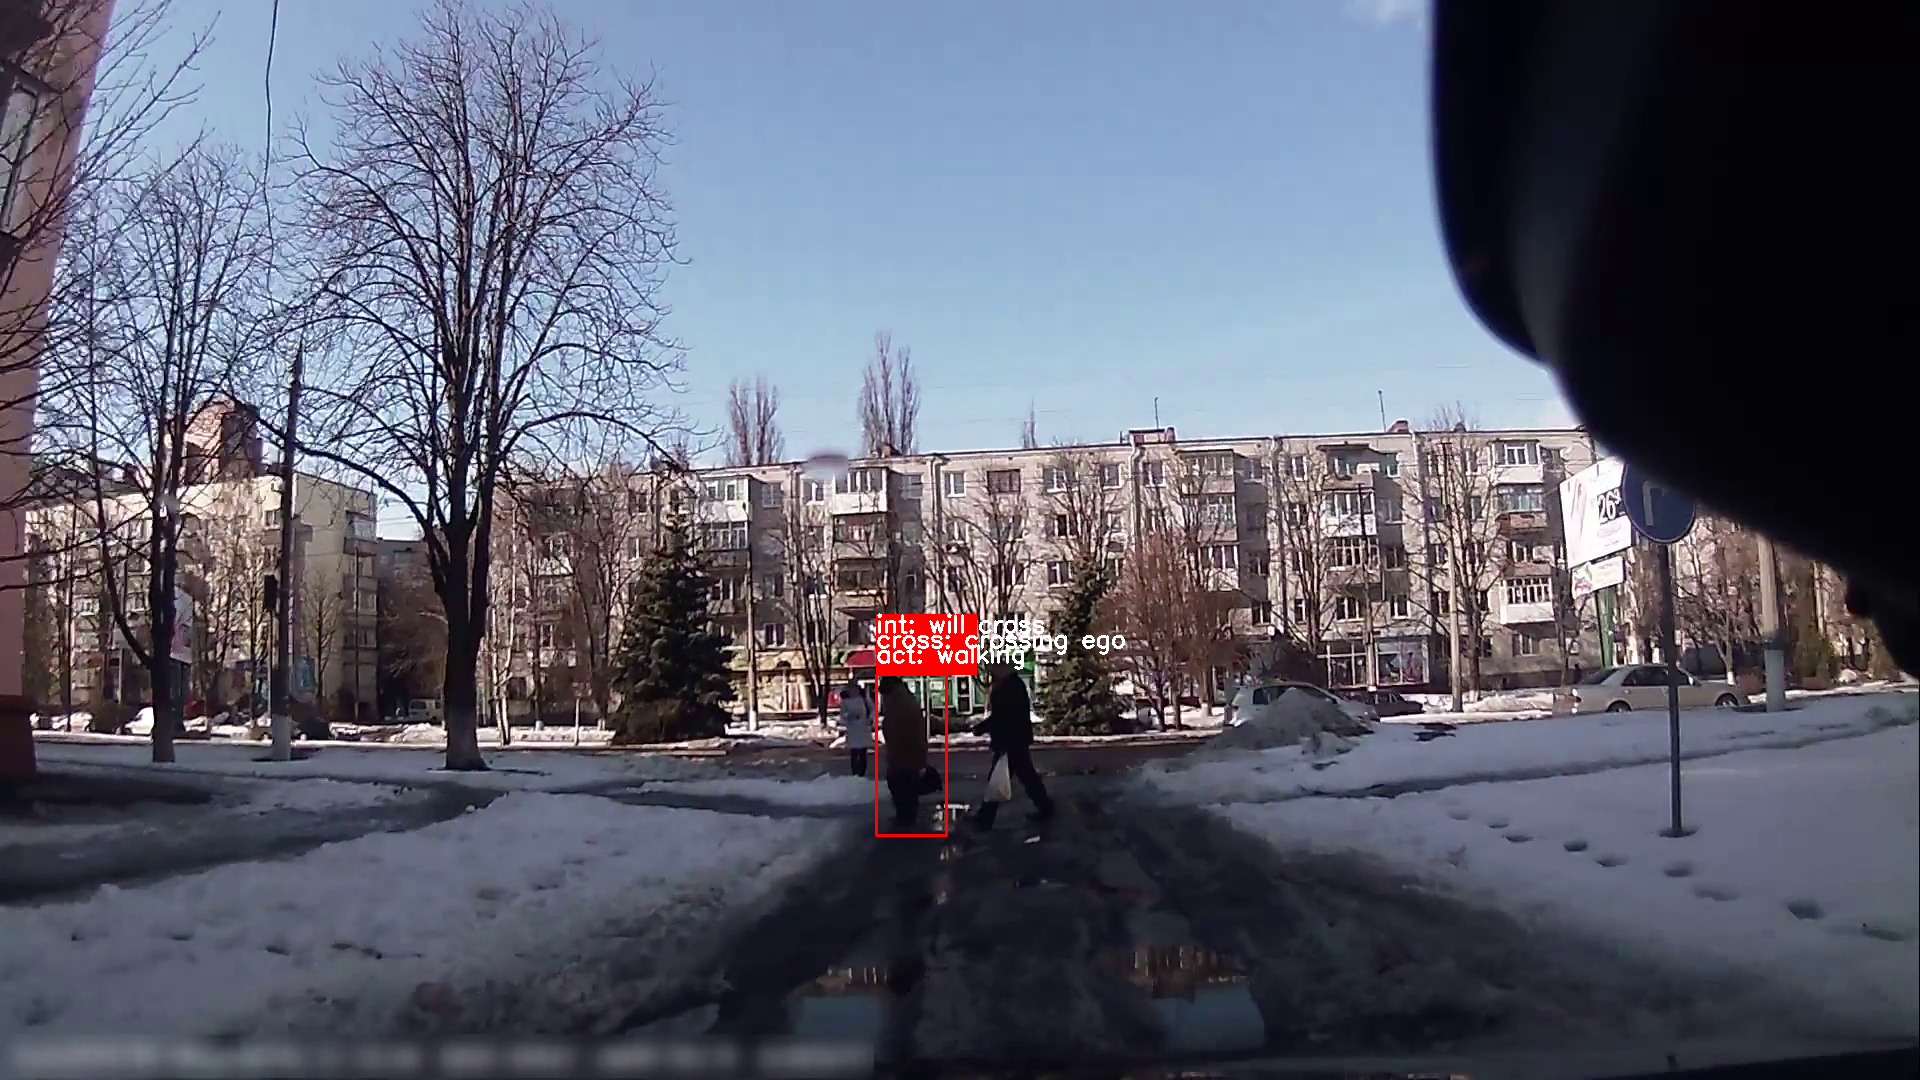

In [23]:
viz = Visualizer(mode='image')
viz.initialize(img_path=image_files[t])

viz.draw_single_bbox(bboxes[t], behaviors=behaviors, color=(255., 0, 0))
# for nei_bbox in neighbor_bboxes[:, t]:
#     viz.draw_single_bbox(nei_bbox, color=(0, 255., 0))

viz_img = Image.fromarray(viz.img)
viz_img